
## Volume 2: OpenGym



<Sam Goldrup\>
<Math 323\>
<3 March 2022\>

**Note:** Some IPython notebook platforms (such as Google Colab) do not currently support rendering OpenAI environments. In order to properly render the OpenGym environments in this lab, you may need to run the Jupyter Notebook locally (for example, run it in VSCode or from the command line).

In [1]:
import gym
import numpy as np
from IPython.display import clear_output
import random
from matplotlib import pyplot as plt

**Problem 1**

*   Implement `random_blackjack()`.
*   Run the game 500 times and output the percentage of games that are wins.



In [2]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    env = gym.make("Blackjack-v1")
    dubs = 0
    for i in range(n): 
        observation = env.reset() #gotta reset the environment
        _,won,play_on,_ = env.step(env.action_space.sample()) #take a random step
        while play_on == False: #while not done
            _,won,play_on,_ = env.step(env.action_space.sample())
        if won == 1:
            dubs += 1
            
    env.close()
    return 100*(dubs/n)

In [3]:
random_blackjack(10000)

28.310000000000002

**Problem 2**

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [4]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    dubs = 0
    env = gym.make("Blackjack-v1")

    for i in range(10000):
        observation = env.reset()
        done = False #we will play while not "done"
        
        if observation[0] <= n:
            draw = 1
        else:
            draw = 0
        
        while not done: #iterate until the game is over
            hand,won,done,dontcare2 = env.step(draw)
            if hand[0] <= n: #number of cards in the hand
                draw = 1
            else:
                draw = 0
        if won == 1:
            dubs += 1
                
    env.close() #gotta make sure to close that environment
            
    return dubs/10000

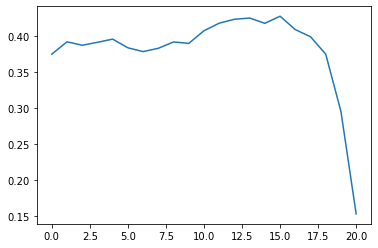

In [5]:
# Plot here

success_vals = []

for j in range(21):
    success_vals.append(blackjack(j)) #iterate over different max hand values
    
plt.plot(list(range(len(success_vals))),success_vals) #make the plot

plt.show()

*Identify which value(s) give the highest winrate here*
n=16 gives the best win rate. 

**Problem 3**

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [6]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v0 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make("CartPole-v1")
    env.reset()
    
    steps = 0
    
    state = env.step(env.action_space.sample()) #position, angle, velocity, pole velocity
    pos,ang,vel,p_vel,done= state[0][0],state[0][1],state[0][2],state[0][3],state[2] #get values for initial state
    
    while not done:
        if render == True: #render the environment as an animation
            env.render()
        if p_vel > 0: # positive velocity means exert force the other way
            state = env.step(1)
            pos,ang,vel,p_vel,done = state[0][0],state[0][1],state[0][2],state[0][3],state[2]
        else: #similar idea as above
            state = env.step(0)
            pos,ang,vel,p_vel,done = state[0][0],state[0][1],state[0][2],state[0][3],state[2]
        steps += 1
            
    env.close() #shut it
    return steps

In [7]:
# Render the game and run once here
cartpole(render=True) #to render

151

In [8]:
# Run the game here and print average steps to termination
step_tot = 0
for i in range(100): #calculate an expectation
    step_tot += cartpole()
    
print("avg with n=100: ", step_tot/100)

avg with n=100:  196.3


**Problem 4**

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [9]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make("MountainCar-v0") #make the mountain car environment
    env.reset()
    
    steps = 0
    
    state = env.step(env.action_space.sample())
    pos,vel,done= state[0][0],state[0][1],state[2] #get initial position, velocity, and whether environment is don
    steps = 1
    
    while not done:
        if render == True: 
            env.render()
        if pos < 0 and vel > 0:
            state = env.step(2)
            pos,vel,done= state[0][0],state[0][1],state[2]
        elif pos > 0 and vel < 0:
            state = env.step(0)
            pos,vel,done= state[0][0],state[0][1],state[2]
        elif pos > 0 and vel > 0:
            state = env.step(2)
            pos,vel,done= state[0][0],state[0][1],state[2]
        else:
            state = env.step(0)
            pos,vel,done= state[0][0],state[0][1],state[2]
        
        steps += 1 #step count!
        
    env.close() #shut it
    
    
    return steps

In [10]:
# Render the game here
car(render=True)

122

In [11]:
# Run the game here and print average steps to termination
sum = 0
for i in range(100):
    sum += car()
print(sum/100)

121.03


**Helper Function for Problem 5**

In [12]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n,env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table


**Problem 5**

* Render the "`Taxi-v3`" environment, act randomly until it terminates, and calculate the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and calculate the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [13]:
# Random actions Taxi game
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [14]:
# Q-table actions Taxi game
q_anon = find_qvalues("Taxi-v3") #make the table

Episode: 100000
Training finished.


In [15]:
def random_acts_of_kindness(render=False):
    env = gym.make("Taxi-v3")
    rewards = 0 
    env.reset() #gotta reset that environment
    dontcare1, reward, done, dontcare2 = env.step(env.action_space.sample()) #make a random step
    rewards += reward
    done = False
    while not done: #play while environment not done yet
        if render==True:
            env.render()
        dontcare, reward, done, dontcare2 = env.step(env.action_space.sample()) #keep making random steps
        rewards += reward
    return rewards    

In [16]:
def q_version(q_table, render=False):
    env = gym.make("Taxi-v3")
    total_qreward = 0
    
    env.reset()
    pos = env.reset() #get initial position
    
    done = False
    while not done:
        if render == True:
            env.render()
        pos, score, done, dntcare = env.step(np.argmax(q_table[pos])) #greedily optimal position on the q table
        total_qreward += score #add up successively
        
    env.close()
    
    return total_qreward
    

In [17]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 10000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 10000 runs
    """
    env = gym.make("Taxi-v3")
    naive_reward = 0
    q_reward = 0
    for i in range(10000):
        naive_reward += random_acts_of_kindness() #add up to get average for method
        q_reward += q_version(q_table) #add up to get average for method
    return naive_reward/10000,q_reward/10000

In [18]:
# Print the average rewards of the Taxi game for both algorithms run 10,000 times
print(taxi(q_anon))

(-769.8919, 7.9558)
